In [3]:
## imports

# nd array manipulation
import numpy as np

# plotting with matplotlib, interactive notebook with jplot style
%matplotlib notebook
import matplotlib.pyplot as plt
from jupyterthemes import jtplot; jtplot.style()

# 3d plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

# colour mapping helpers
import matplotlib.colors as colors
import matplotlib.cm as cmx


In [4]:
# set auto reload imported modules tagged
%load_ext autoreload
%autoreload 2

# add custom python packages directory to path
import sys
sys.path.append('/home/brendan/dev/optics')

# import path tracing and image transformation engine
import optics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


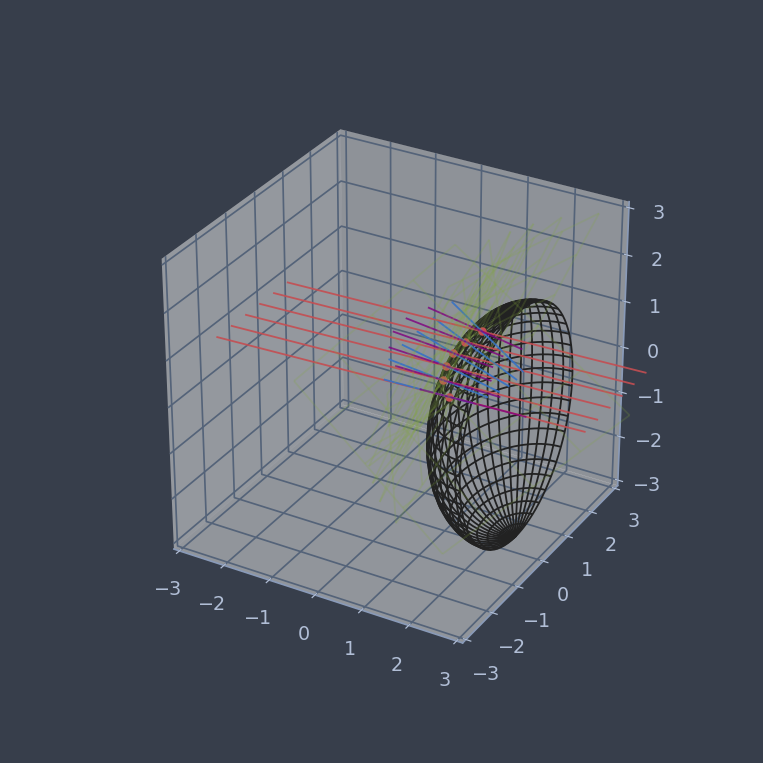

In [16]:
## test ray-optic refraction path calculation and 3d display

# initialise 3d figure
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-3., 3.)
ax.set_ylim(-3., 3.)
ax.set_zlim(-3., 3.)


# ellipse centre, radius, and axis vectors
C = np.array([2., 1., -1.])
r = 2.5
#e = [0.4, .6, .6]
e = np.array([0.6, .9, 1.])

rx, ry, rz = np.array(e) * r

# Set of all spherical angles:
u = np.linspace(0.5 * np.pi, 1.5 * np.pi, 50)
k = np.linspace(0., np.pi, 50)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(k)) + C[0]
y = ry * np.outer(np.sin(u), np.sin(k)) + C[1]
z = rz * np.outer(np.ones_like(u), np.cos(k)) + C[2]

# plot ellipsoid
ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k')


for Ly in np.arange(-1., 2., .5)[:]:

    # point on line (origin) and direction vector
    #L0 = [.0, 2., .5]
    L0 = [.0, Ly, .5]
    v = [1., .2, -.1]

    icepts = optics.get_intercept(C, r, e, L0, v)

    # define ray line points
    line = np.array([L0]).T + np.arange(-3., 5., 1.) * np.array([v]).T

    # plot ray line from points
    ax.plot( line[0,], line[1,], line[2,], color = 'r', alpha = 0.9)

    # plot intercept points
    for icept in icepts[-1:]:
        ax.plot(*icept, 'or')

    # point of intercept (on tangent plane)
    p = icepts[-1][:,0]

    # calculate surface normal vector
    n = optics.get_surface_normal(C, e, p)

    # calculate d coefficient from point and normal vector
    d = p @ n - r

    # define ray line points
    line = np.array([p]).T + np.arange(p[0] - 2., p[0] + 1.) * np.array([n]).T
    # plot ray line from points
    ax.plot( line[0,], line[1,], line[2,], color = 'b', alpha = 0.9)


    # create y,z mesh
    yy, zz = np.meshgrid(np.arange(p[1] - 2., p[1] + 3.), np.arange(p[2] - 2., p[2] + 3.))
    # calculate corresponding x
    x = (r - (yy*n[1]) - (zz*n[2]) + d) / n[0]

    # plot ellipsoid
    ax.plot_wireframe(x, yy, zz,  rstride = 1, cstride = 1, color = 'g', alpha = 0.2)

    
    n1 = 1.0
    n2 = 1.5
    
    V = optics.get_refracted_vector(n1, n2, n, v)

    # define ray line points
    line = np.array([p]).T + np.arange(p[0] - 2., p[0] + 1.) * np.array([V]).T
    # plot ray line from points
    ax.plot( line[0,], line[1,], line[2,], color = 'purple', alpha = 0.8)
    

# format and display figure
plt.show()


<IPython.core.display.Javascript object>


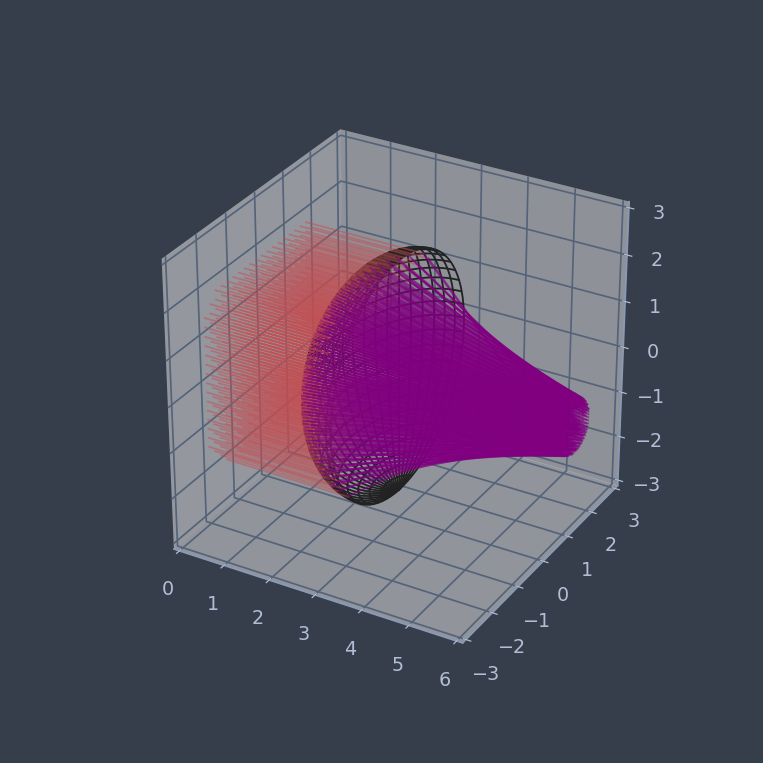

In [5]:

# initialise 3d figure
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 6.)
ax.set_ylim(-3., 3.)
ax.set_zlim(-3., 3.)

# initial refractive index
n1 = 1.0

# ellipse centre, radius, and axis vectors
C = np.array([3., 0., 0.])
r = 2.5
#e = [0.4, .6, .6]
e = np.array([0.6, 1., 1.])
# optic refractive index
n2 = 1.8

# generate and plot lens
rx, ry, rz = np.array(e) * r
# set of all spherical angles:
u = np.linspace(0.5 * np.pi, 1.5 * np.pi, 50)
k = np.linspace(0., np.pi, 50)
# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(k)) + C[0]
y = ry * np.outer(np.sin(u), np.sin(k)) + C[1]
z = rz * np.outer(np.ones_like(u), np.cos(k)) + C[2]
# plot ellipsoid
ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k')


for Lz in np.arange(-2., 2.0, .2)[:]:
    for Ly in np.arange(-2., 2.0, .2)[:]:

        # point on line (origin) and direction vector
        L0 = [0., Ly, Lz]
        v = [1., 0., 0.]
        v = v / np.linalg.norm(v)

        # calculate ray ellipsoid intersection
        icepts = optics.get_intercept(C, r, e, L0, v)

        # only calculate refraction for intersections (exclude tangents)
        if len(icepts) > 1:
            # point of intercept (on surface normal)
            p = icepts[-1][:,0]

            # define ray line points and plot
            line = np.array([L0]).T + np.arange(0., p[0] + .1, .1) * np.array([v]).T
            ax.plot( line[0,], line[1,], line[2,], color = 'r', alpha = 0.5)
            
            # calculate surface normal vector
            n = optics.get_surface_normal(C, e, p)

            # get unit vector of refracted ray using snells law
            V = optics.get_refracted_vector(n1, n2, n, v)

            # define ray line points
            line = np.array([p]).T + np.arange(0, 2*r, .1) * np.array([V]).T
            # plot ray line from points
            ax.plot( line[0,], line[1,], line[2,], color = 'purple', alpha = 0.6)
    

# format and display figure
plt.show()


<IPython.core.display.Javascript object>


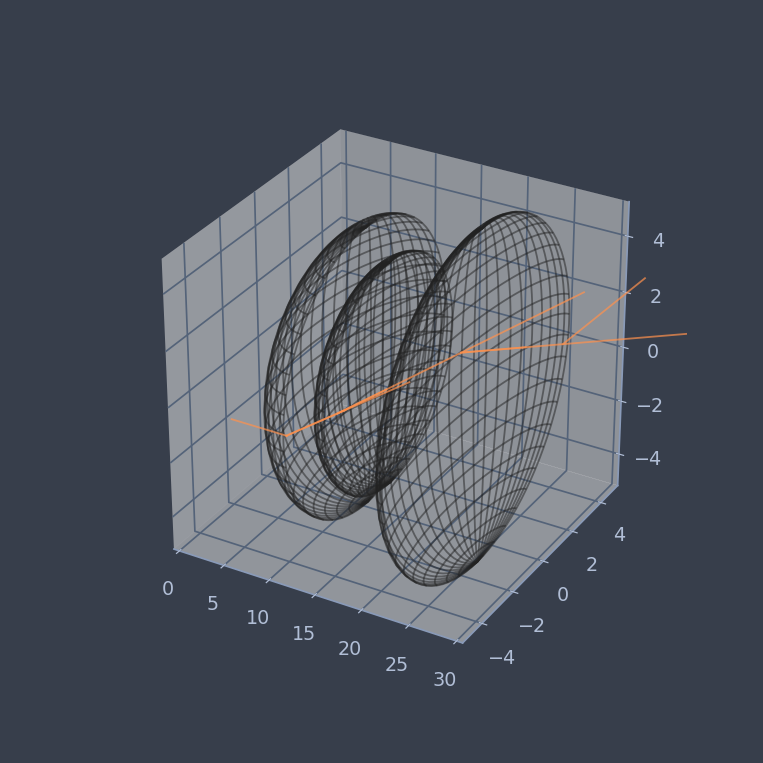

In [3]:

# define optics
## update centre position to relative front surface of optic

opts = [
    {
        'centre': np.array([5.+5*1.3, 0., 0.]),
        'opt_den': 1.5,
        'scale': np.array([1.3, 1., 1.]),
        'radius': 5.,
        'rev': False,
    },
    {
        'centre': np.array([10.+4., 0., 0.]),
        'opt_den': 1.8,
        'scale': np.array([1., 1., 1.]),
        'radius': 4.,
        'rev': False,
    },
    {
        'centre': np.array([20.+6.*0.6, 0., 0.]),
        'opt_den': 3.0,
        'scale': np.array([0.6, 1., 1.]),
        'radius': 6.0,
        'rev': False,
    },
    {
        'centre': np.array([30., 0., 0.]),
        'opt_den': 1.0,
        'scale': np.array([0.1, 1., 1.]),
        'radius': 6.0,
        'rev': False,
    },
    
]


# initialise 3d figure
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 30.)
ax.set_ylim(-5., 5.)
ax.set_zlim(-5., 5.)

# plot all optics
for optic in opts[:-1]:
    # define optic(ellipsoid): centre, radius, axes scale, refractive index
    C = optic['centre']
    r = optic['radius']
    e = optic['scale']
    n2 = optic['opt_den']
    rev = optic['rev']
    # get optic points in 3d for plotting
    x, y, z = optics.plot_3d_ellipsoid(C, r, e, rev)
    # plot ellipsoid
    ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k', alpha = 0.5)


## ray tracing
stp = 1.
rng = 2.
for Lz in np.arange(-rng, rng + stp, stp)[:1]:
    for Ly in np.arange(-rng, rng + stp, stp)[:1]:
        
        # initial refractive index (air)
        n1 = 1.0
        # origin ray position and direction vector
        L0 = [0., Ly, Lz]
        v = [1., 0., 0.]#; v = v / np.linalg.norm(v)

        for optic in opts:
            # define optic(ellipsoid): centre, radius, axes scale, refractive index
            C = optic['centre']
            r = optic['radius']
            e = optic['scale']
            n2 = optic['opt_den']

            
            # calculate ray ellipsoid intersection
            icepts = optics.get_intercept(C, r, e, L0, v)
            # only calculate refraction for intersections (exclude tangents)
            if len(icepts) > 1:
                # point of intercept (on surface normal)
                p = icepts[-1][:,0]

                # plot origin ray to optic intercept
                x, y, z = optics.plot_3d_line(L0, v, p[0])
                ax.plot(x, y, z, color = 'y', alpha = 0.7)


                # calculate surface normal vector
                n = optics.get_surface_normal(C, e, p)
                # get unit vector of refracted ray using snells law
                V = optics.get_refracted_vector(n1, n2, n, v)

                # plot refracted ray through optic intercept
                x, y, z = optics.plot_3d_line(p, V, r)
                # plot ray line from points
                ax.plot(x, y, z, color = 'y', alpha = 0.7)


                # update origin ray position and vector
                n1 = n2
                v = V
                L0 = p


# format and display figure
plt.show()


In [3]:

opts = [
    { # cornea
        'centre': np.array([(10. + 7.8*np.sqrt(0.5)), 0., 0.]),
        'opt_den': 1.377,
        'scale': np.array([np.sqrt(0.5), 1., 1.]), # conic constant of -0.5
        'radius': 7.8,
        'rev': False,
    },
    { # aqueous
        'centre': np.array([(10.6 + 6.4), 0., 0.]),
        'opt_den': 1.336,
        'scale': np.array([1., 1., 1.]),
        'radius': 6.4,
        'rev': False,
    },
    { # iris
        'centre': np.array([(13.5 + 2.0 * 0.01), 0., 0.]),
        'opt_den': 1.336,
        'scale': np.array([0.01, 1., 1.]),
        'radius': 2.0,
        'rev': False,
    },
    { # lens front
        'centre': np.array([(13.6 + 10.1), 0., 0.]),
        #'centre': np.array([(13.6 + 5.95), 0., 0.]),
        'opt_den': 1.411,
        'scale': np.array([1., 1., 1.]),
        'radius': 10.1, # 10.1 at inf., 5.95 near
        #'radius': 5.95, # 10.1 at inf., 5.95 near
        'rev': False,
    },
    { # lens rear
        'centre': np.array([(17.6 - 6.1*np.sqrt(4.5)), 0., 0.]),
        'opt_den': 1.337,
        #'opt_den': 1.411,
        'scale': np.array([np.sqrt(4.5), 1., 1.]),
        'radius': 6.1,
        'rev': True,
    },
    { # retina
        'centre': np.array([34.8 + 12.5, 0., 0.]),
        'opt_den': 1.,
        'scale': np.array([1., 1., 1.]),
        'radius': 12.5,
        'rev': True,
    },
    
]

In [6]:
rays = []

## ray tracing
stp = .2
rng = 3.
for Lz in np.arange(-rng, rng + stp, stp)[:]:
    for Ly in np.arange(-rng, rng + stp, stp)[:]:
        
        # origin ray position and direction vector
        L0 = np.array([0., Ly, Lz])
        v = np.array([1., 0., 0.])
        # normalise direction vector to unit
        v = v / np.linalg.norm(v)
        
        rays.append([L0, v])


In [7]:
# get ray paths through optics chain
paths = optics.get_paths(rays, opts)


<IPython.core.display.Javascript object>


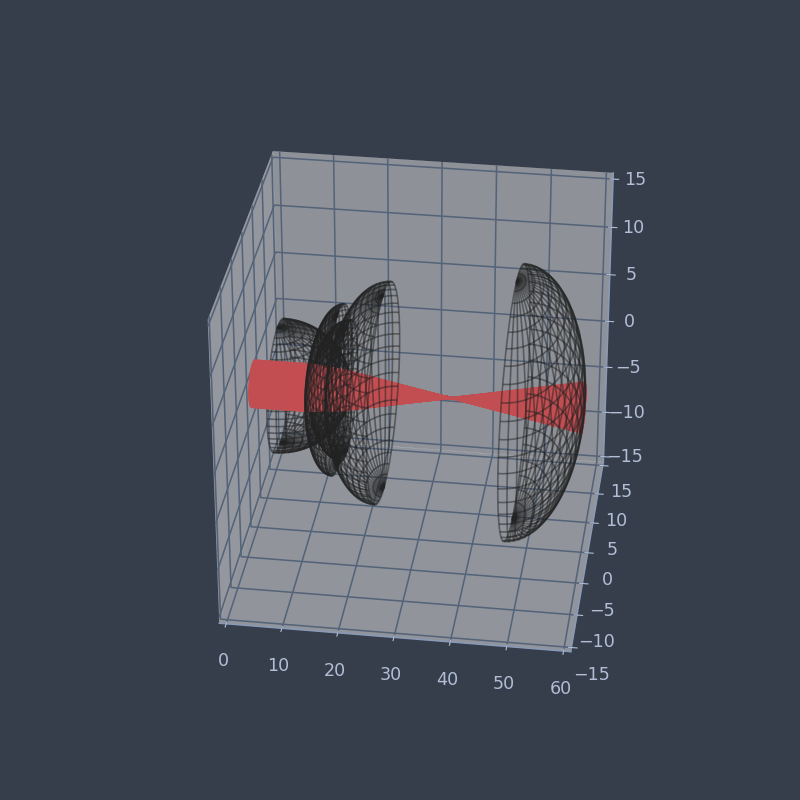

In [94]:
## plot ray paths

# initialise 3d figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(0., 60.)
ax.set_ylim(-15., 15.)
ax.set_zlim(-15., 15.)


# plot all optics
if True:
    # iterate over each optic in chain
    for optic in opts[:]:
        
        # get optic parameters
        C = optic['centre']
        r = optic['radius']
        e = optic['scale']
        n2 = optic['opt_den']
        rev = optic['rev']

        # get optic points in 3d for plotting
        x, y, z = optics.plot_3d_ellipsoid(C, r, e, rev)
        # plot ellipsoid
        ax.plot_wireframe(x, y, z,  rstride = 2, cstride = 2, color = 'k', alpha = 0.5)


# iterate over each ray path
for i in range(len(paths)):
    
    # check for any refraction of ray with optics
    #if len(paths[i]) > 1:
    # only ray that hit retina
    if len(paths[i]) == 7:
        path = paths[i]
        
        # iterate ray path through optics
        for j in range(len(path)-1):
            
            # plot path segment
            ax.plot([path[j][0][0], path[j+1][0][0]],
                    [path[j][0][1], path[j+1][0][1]],
                    [path[j][0][2], path[j+1][0][2]],
                    color = 'r', alpha = 0.7)

# format and display figure
plt.show()


In [34]:
## calculate ray paths through optics chain to retinal image

# define optics chain
opts = [
    { # cornea
        'centre': np.array([(10. + 7.8*np.sqrt(0.5)), 0., 0.]),
        'opt_den': 1.377,
        'scale': np.array([np.sqrt(0.5), 1., 1.]), # conic constant of -0.5
        'radius': 7.8,
        'rev': False,
    },
    { # aqueous
        'centre': np.array([(10.6 + 6.4), 0., 0.]),
        'opt_den': 1.336,
        'scale': np.array([1., 1., 1.]),
        'radius': 6.4,
        'rev': False,
    },
    { # iris
        'centre': np.array([(13.5 + 2.0 * 0.01), 0., 0.]),
        'opt_den': 1.336,
        'scale': np.array([0.01, 1., 1.]),
        'radius': 2.0,
        'rev': False,
    },
    { # lens front
        'centre': np.array([(13.6 + 10.1), 0., 0.]),
        #'centre': np.array([(13.6 + 5.95), 0., 0.]),
        'opt_den': 1.411,
        'scale': np.array([1., 1., 1.]),
        'radius': 10.1, # 10.1 at inf., 5.95 near
        #'radius': 5.95, # 10.1 at inf., 5.95 near
        'rev': False,
    },
    { # lens rear
        'centre': np.array([(17.6 - 6.1*np.sqrt(4.5)), 0., 0.]),
        'opt_den': 1.337,
        #'opt_den': 1.411,
        'scale': np.array([np.sqrt(4.5), 1., 1.]),
        'radius': 6.1,
        'rev': True,
    },
    { # retina
        'centre': np.array([34.8 + 12.5, 0., 0.]),
        'opt_den': 1.,
        'scale': np.array([1., 1., 1.]),
        'radius': 12.5,
        'rev': True,
    },
    
]

# define rays
rays = []

## ray tracing
#stp = .02
#rng = 1.
stp = .1
rng = 3.
for Lz in np.arange(-rng, rng + stp, stp)[:]:
    for Ly in np.arange(-rng, rng + stp, stp)[:]:
        
        # origin ray position and direction vector
        L0 = np.array([0., Ly, Lz])
        v = np.array([1., 0., 0.])
        # normalise direction vector to unit
        v = v / np.linalg.norm(v)
        
        rays.append([L0, v])

# get ray paths through optics chain
paths = optics.get_paths(rays, opts)
        

<IPython.core.display.Javascript object>


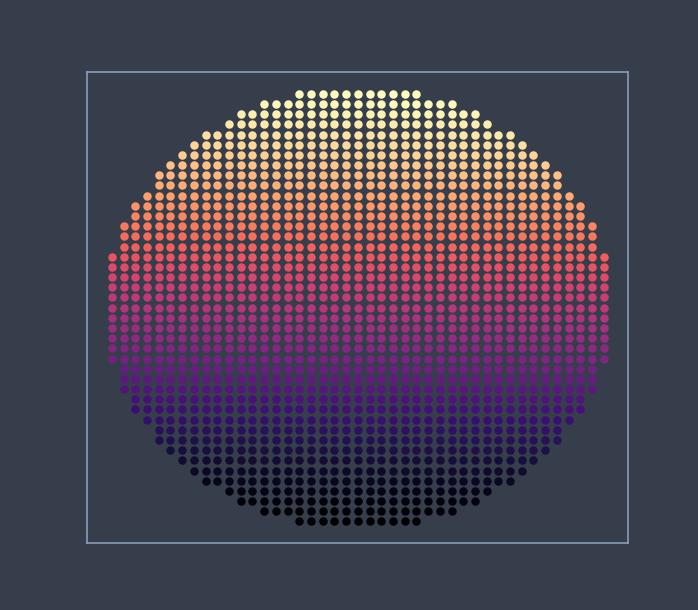

In [37]:
## plot initial ray positions (virtual image location)

# get initial position of all rays that reach retina
init = [ path[0][0][1:] for path in paths if len(path) == 7 ]
#init = [ path[0][0][1:] for path in paths ]

# get colour map for rays
cnorm = colors.Normalize(vmin = 0, vmax = len(init))
smap = cmx.ScalarMappable(norm = cnorm, cmap = 'magma')

# iterate each ray initial position
for i in range(len(init)):
    
    # get ray colour
    c = smap.to_rgba(i)

    # plot 2d retinal image
    plt.plot(init[i][0], init[i][1], 'o', color = c)

plt.grid(); plt.xticks([]); plt.yticks([])
plt.show()


<IPython.core.display.Javascript object>


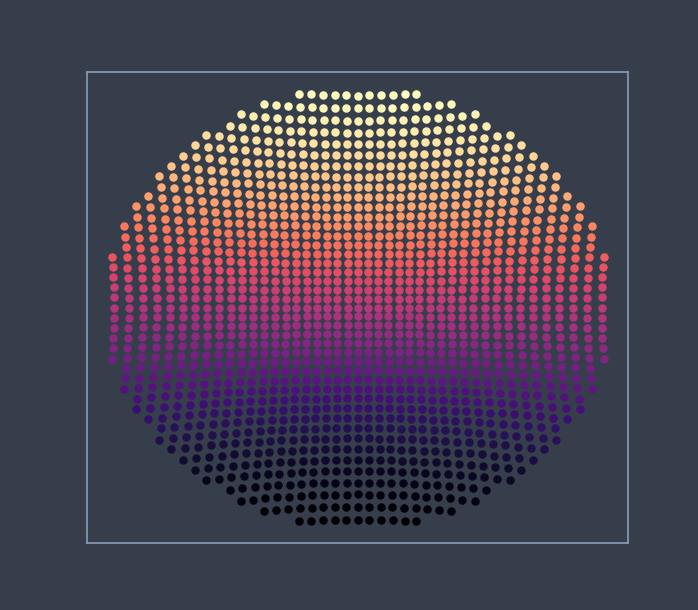

In [40]:
## plot retinal image

# retinal distance and radius
r = 12.5
d = 34.8
# get retinal image
img = optics.get_retinal_img(paths, r, d)

# get colour map for rays
cnorm = colors.Normalize(vmin = 0, vmax = len(img))
smap = cmx.ScalarMappable(norm = cnorm, cmap = 'magma')

# iterate each ray initial position
for i in range(len(img)):
    
    # get ray colour
    c = smap.to_rgba(i)

    # plot 2d retinal image
    plt.plot(img[i][0], img[i][1], 'o', color = c)

plt.grid(); plt.xticks([]); plt.yticks([])
plt.show()


In [49]:
from scipy import ndimage

In [69]:
# import image data from tif file into np array
test_image = optics.import_image('./test-img-1.png').astype(np.float32)

In [70]:
test_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<IPython.core.display.Javascript object>


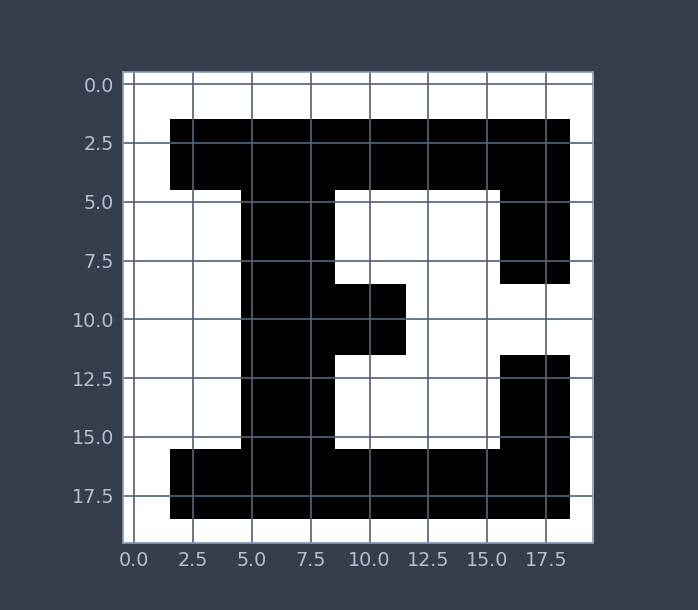

In [72]:

plt.imshow(test_image[::5, ::5], cmap = 'bone_r')

#plt.grid(); plt.xticks([]); plt.yticks([])

plt.show()

In [73]:
test_image.shape

(100, 100)

In [74]:
ndimage.zoom(test_image, 0.2).shape

(20, 20)

(10, 10)


<IPython.core.display.Javascript object>


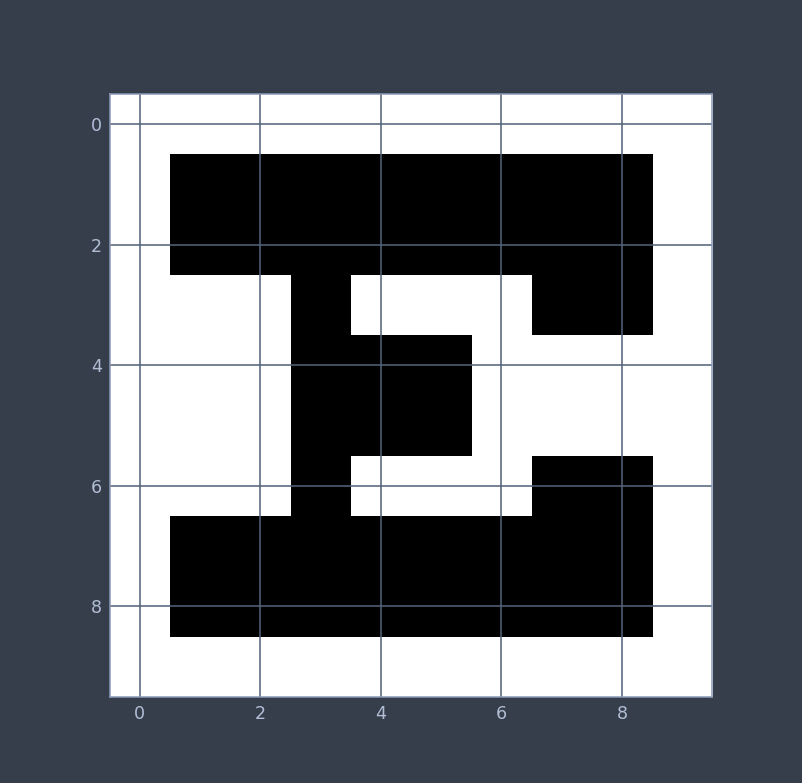

In [93]:

img = ndimage.zoom(test_image, 0.1, order = 1, mode = 'nearest')
print(img.shape)

plt.imshow(img, cmap = 'bone_r')

#plt.grid(); plt.xticks([]); plt.yticks([])

plt.show()

<IPython.core.display.Javascript object>


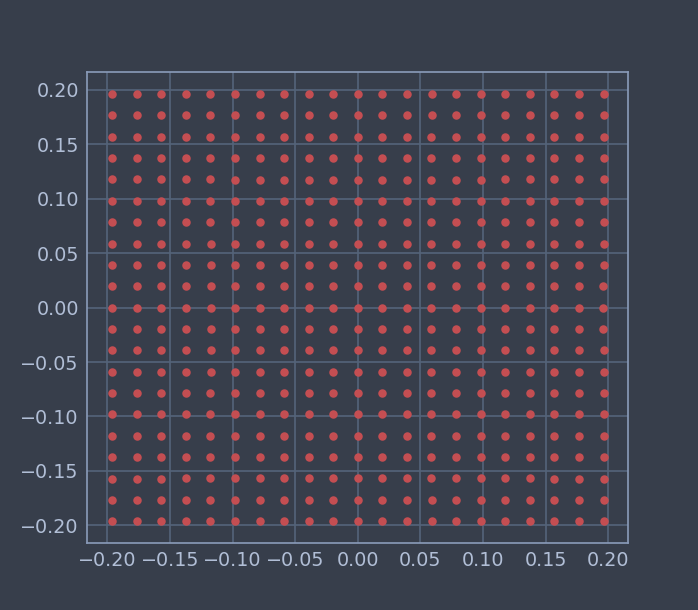

In [5]:
## focus fovea

# retinal distance and radius
r = 12.5
d = 34.8
# get retinal image
img = optics.get_retinal_img(paths, r, d)
# trim range for fovea region
fr = 0.2
j = np.where((np.abs(img[:,0]) <= fr ) & (np.abs(img[:,1]) <= fr ))
x = img[j,0]
y = img[j,1]

# plot 2d retinal image
plt.plot(x, y, 'or')

plt.show()


<IPython.core.display.Javascript object>


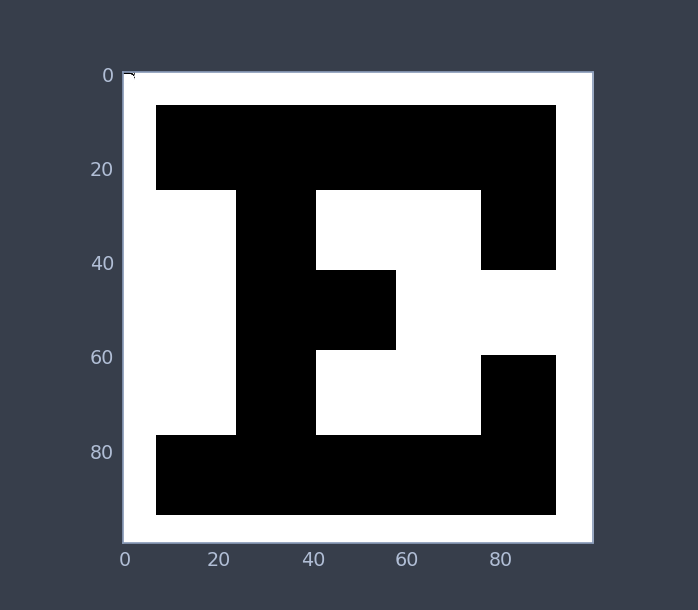

In [8]:

# retinal distance and radius
r = 12.5
d = 34.8
# get retinal image
img = optics.get_retinal_img(paths, r, d)[:10000,:]

t_map = np.array([test_image.flatten()[:10000]]).T

img = np.column_stack([img, t_map])

plt.scatter(img[:,0], img[:,1], c = img[:,2], cmap = 'bone_r')

plt.show()
